In [348]:
#Import Exoplanet Data

import os 
print(os.listdir("../astroML"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv as csv
from sklearn.preprocessing import LabelEncoder
%matplotlib inline


train_set = pd.read_csv("../astroML/Exo-planets(habitable).csv", header = 0) 
test_set = pd.read_csv("../astroML/Exo-planets(Non-habitable).csv", header = 0)


#Drop Irrelevant Columns from train_set
train_set=train_set.drop("Distance",axis=1)
train_set=train_set.drop("Eqilibrium_temp",axis=1)
train_set=train_set.drop("Eccentricity",axis=1)
train_set=train_set.drop("Surface_Stellar_gravity",axis=1)

#Drop Irrelevant Columns from test_set
test_set=test_set.drop("Distance",axis=1)
test_set=test_set.drop("Eqilibrium_temp",axis=1)
test_set=test_set.drop("Eccentricity",axis=1)
test_set=test_set.drop("Surface_Stellar_gravity",axis=1)



['missing.csv', 'Exo-planets.ipynb', 'composite_exo_planet.csv', 'Train_data.csv', '.ipynb_checkpoints', 'composite_exo_planetsNEW.csv', 'Exo-planets.csv', 'ESI calculate.pdf', '5228128.pdf']


In [349]:
print (train_set.shape)
train_set.head()

(49, 12)


,Planet_name,Orbit_period,Semi_major_axis,Mass (EU),Radius (EU),Density,Insolation_flux,Effective_temp,Stellar_luminosity,Stellar_mass,Stellar_radius,Habitable
0,TRAPPIST-1 e,6.099615,0.02817,0.62,0.918,4.40,0.66,2559.0,-3.281,0.08,0.12,1
1,Proxima Cen b,11.186000,0.04850,1.27,1.080,5.54,0.65,3050.0,-2.810,0.12,0.14,1
2,Kepler-1229 b,86.828989,0.30060,2.54,1.400,6.13,0.52,3784.0,-1.177,0.54,0.51,1
3,GJ 667 C f,39.026000,0.15600,2.70,1.450,4.87,NaN,3350.0,-1.863,0.33,NaN,1
4,Kepler-442 b,112.305300,0.40900,2.36,1.340,5.39,0.66,4402.0,-0.932,0.61,0.60,1


In [350]:
#Romoving NaN values from data

#test_set = test_set[:500]
print (test_set.shape)
test_set = test_set.dropna()
train_set = train_set.dropna()
print (test_set.shape)

#if data set has nan values
#Check for missing data & list them 
datasetHasNan = False
if train_set.count().min() == train_set.shape[0] and test_set.count().min() == test_set.shape[0] :
    print('We do not need to worry about missing values.') 
else:
    datasetHasNan = True
    print('oops we have nan') 
if datasetHasNan == True:
    nas = pd.concat([train_set.isnull().sum(), test_set.isnull().sum()], axis=1, keys=['Train Dataset', 'Test Dataset']) 
    print('Nan in the data sets')
    #print (nas)
    print(nas[nas.sum(axis=1) > 0])

(3869, 12)
(1066, 12)
We do not need to worry about missing values.


In [351]:
#Merging train data and test data

all_data = train_set.append(test_set)
all_data = all_data.sample(frac=1).reset_index(drop=True)
labels = all_data['Habitable']
le = LabelEncoder()
labels = le.fit_transform(labels) 

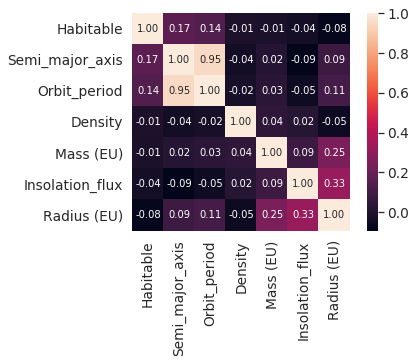

In [352]:
#Data Analysis

#Correlation Analysis
#Habitable Correlation matrix
corrmat = all_data.corr()
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Habitable')['Habitable'].index
cm = np.corrcoef(all_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


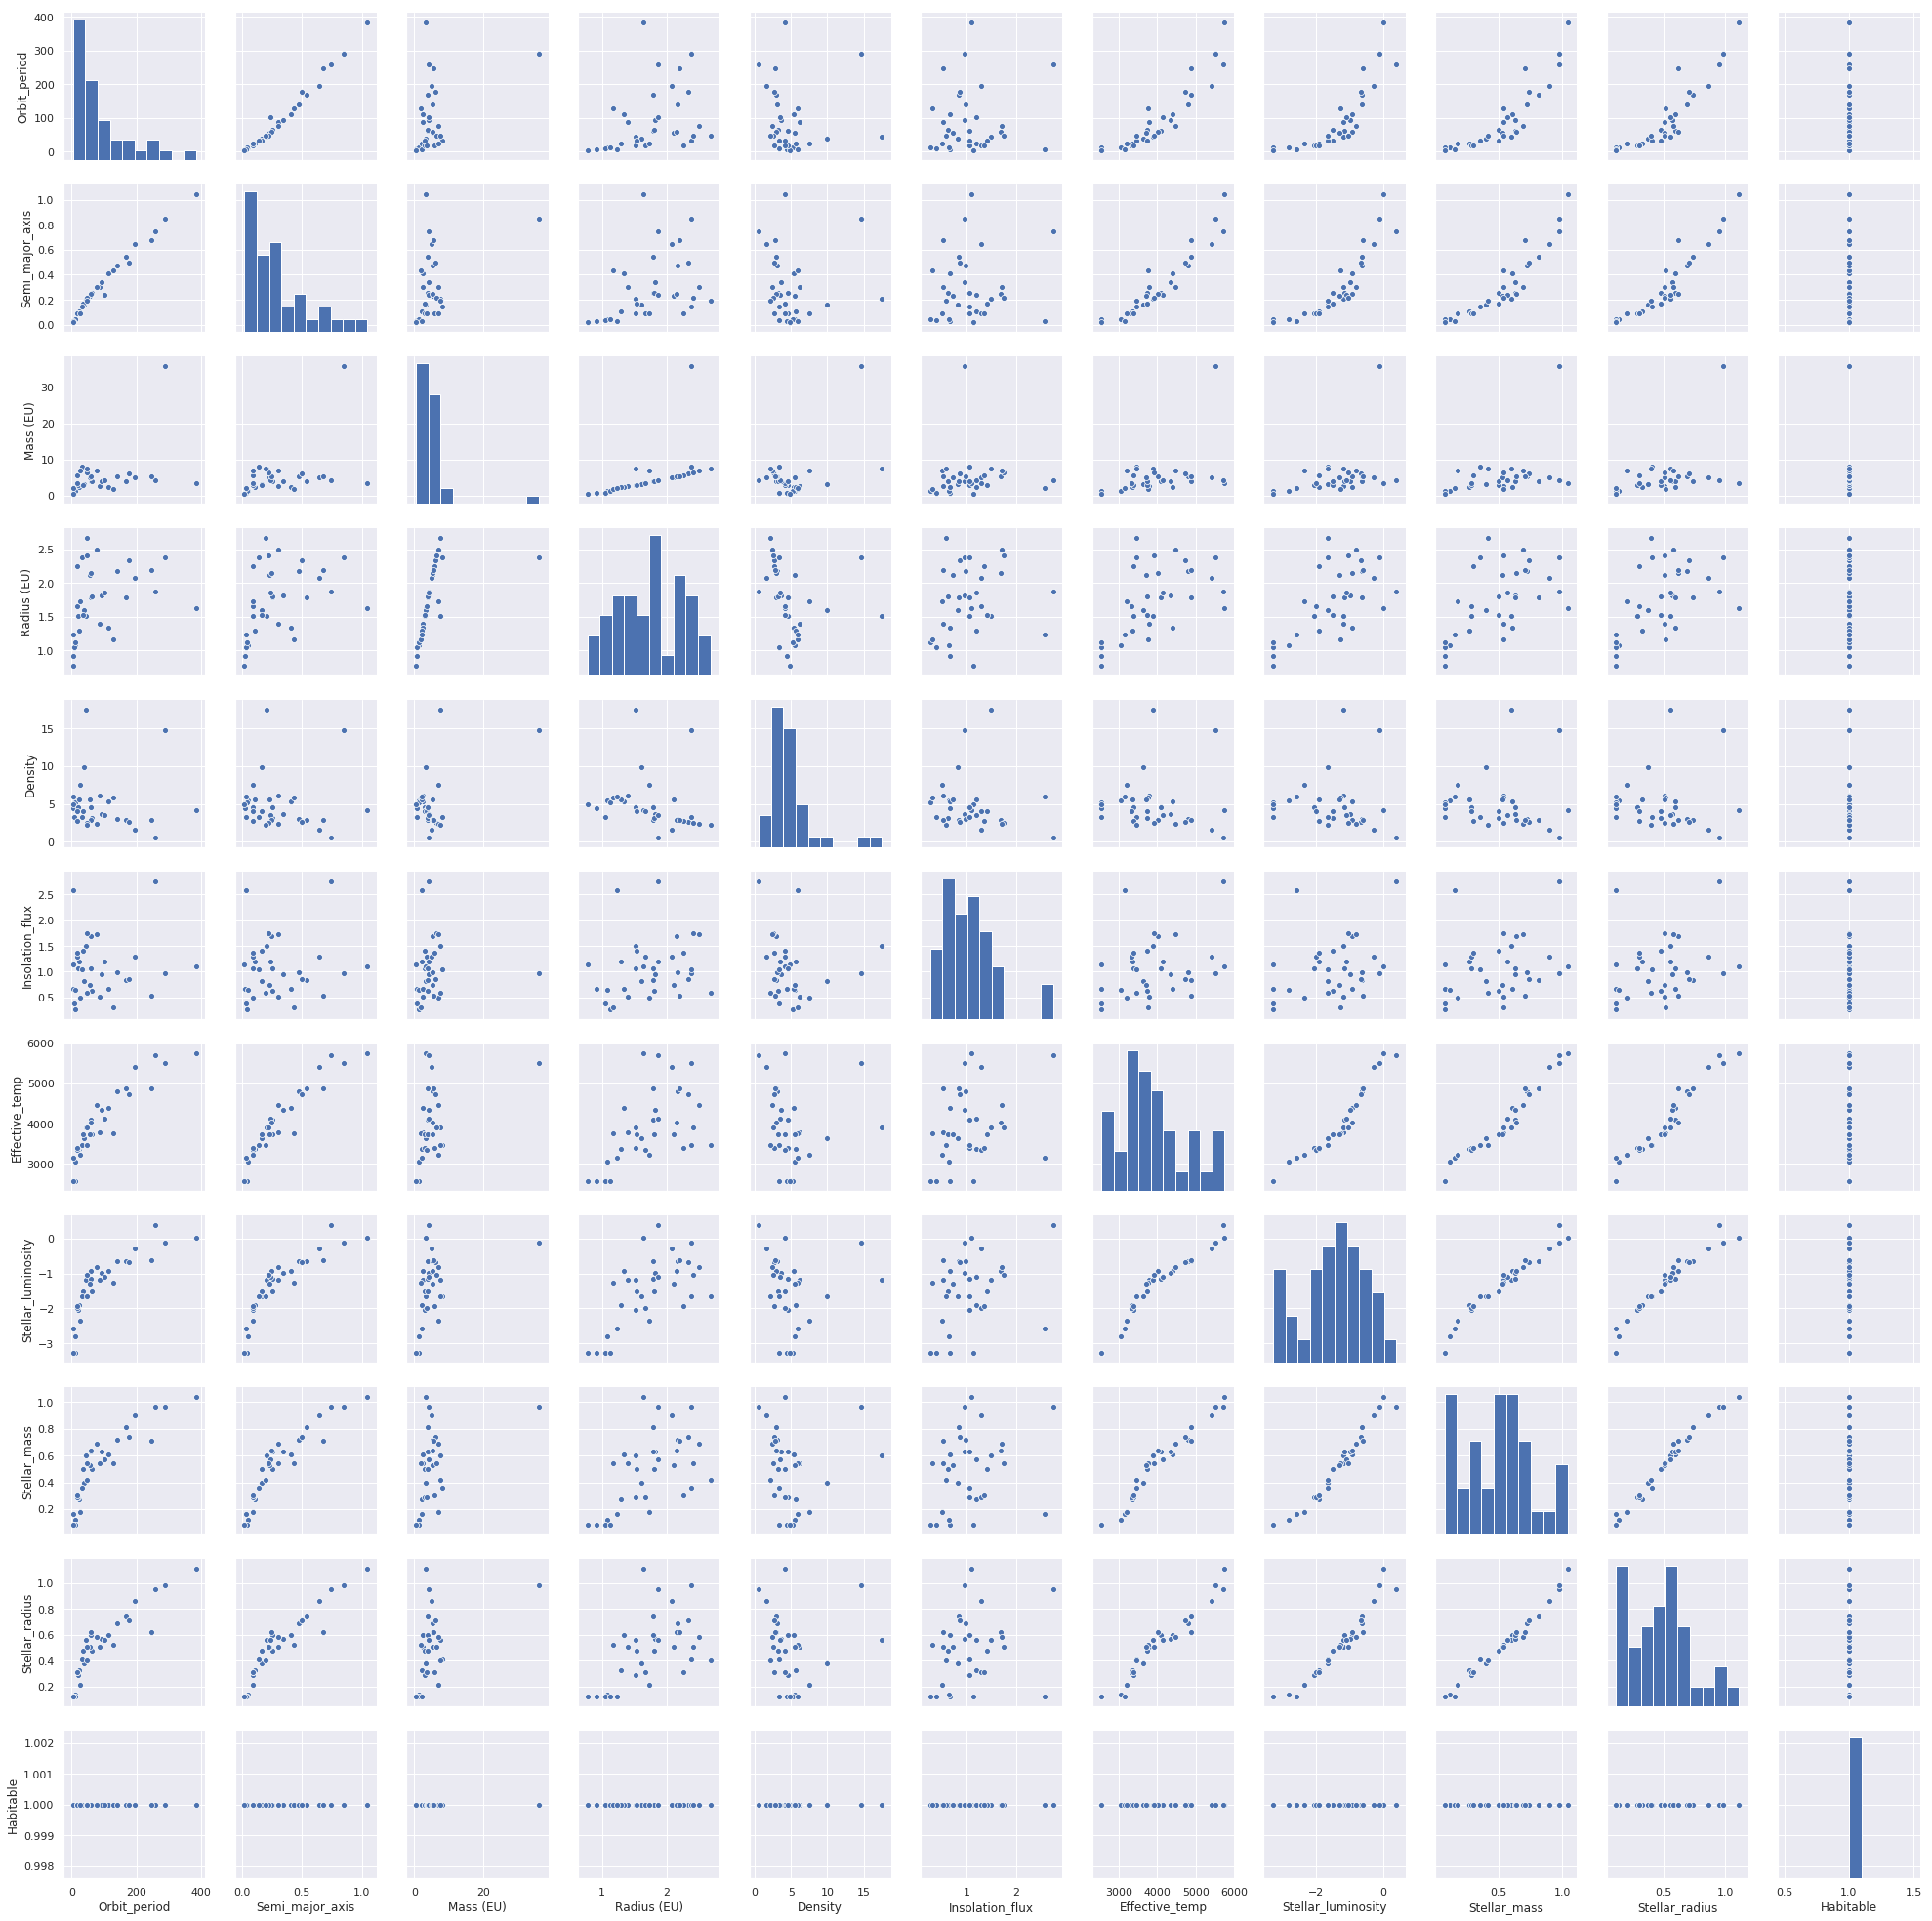

In [354]:
#Scatter-Plots for various features 

sns.set()
cols = ['Orbit_period','Semi_major_axis','Mass (EU)','Radius (EU)','Density','Insolation_flux','Effective_temp','Stellar_luminosity','Stellar_mass','Stellar_radius','Habitable']
#cols = ['Habitable','Orbit_period','Semi_major_axis']
sns.pairplot(train_set[cols], height = 2.5)
plt.show();

In [355]:
# Drop irrelevant columns
all_data=all_data.drop("Habitable",axis=1)
all_data=all_data.drop("Planet_name",axis=1)

In [356]:
labels

array([0, 0, 0, ..., 0, 0, 0])

In [357]:
#Classification Logistic Regression 

from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(all_data, labels, test_size=0.25, random_state=42)


from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression().fit(features_train,labels_train)
pred = lgr.predict(features_test)
predictions = lgr.predict(features_train)

In [358]:
#Accuracy Report
from sklearn.metrics import classification_report

print(classification_report(labels_test,pred))

print(classification_report(labels_train,predictions))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99       265
          1       0.69      0.82      0.75        11

avg / total       0.98      0.98      0.98       276

             precision    recall  f1-score   support

          0       0.99      0.99      0.99       801
          1       0.71      0.71      0.71        24

avg / total       0.98      0.98      0.98       825



In [359]:
#Classification by Support Vector MAchine (SVM)

from sklearn.svm import SVC

svc = SVC().fit(features_train,labels_train)

pred = svc.predict(features_test)

predictions = svc.predict(features_train)


In [360]:
#Accuracy Report
print(classification_report(labels_test,pred))

print(classification_report(labels_train,predictions))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98       265
          1       0.00      0.00      0.00        11

avg / total       0.92      0.96      0.94       276

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       801
          1       1.00      0.96      0.98        24

avg / total       1.00      1.00      1.00       825



/home/vaibhav/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [361]:
#Classification by RandomForest

from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier().fit(features_train,labels_train)

pred = rfr.predict(features_test)

predictions = rfr.predict(features_train)


In [362]:
#Acuracy Report
print(classification_report(labels_test,pred))

print(classification_report(labels_train,predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       265
          1       0.88      0.64      0.74        11

avg / total       0.98      0.98      0.98       276

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       801
          1       0.96      0.96      0.96        24

avg / total       1.00      1.00      1.00       825



In [363]:
#Classification by Naive Bayes

from sklearn.naive_bayes import GaussianNB

nbc = GaussianNB().fit(features_train,labels_train)

pred = nbc.predict(features_test)

predictions = nbc.predict(features_train)

In [364]:
#Acuracy Report
print(classification_report(labels_test,pred))

print(classification_report(labels_train,predictions))

             precision    recall  f1-score   support

          0       1.00      0.95      0.97       265
          1       0.44      1.00      0.61        11

avg / total       0.98      0.95      0.96       276

             precision    recall  f1-score   support

          0       1.00      0.96      0.98       801
          1       0.40      1.00      0.57        24

avg / total       0.98      0.96      0.97       825

